## Importing Dependences

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load the dataset

In [27]:
df = pd.read_csv('/content/flipkart_product_.csv', encoding="unicode_escape")
df.head()

,product_name,product_price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product


## Check the shape of the data

In [11]:
df.shape

(205052, 5)

## Display basic information about the DataFrame

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
dtypes: object(5)
memory usage: 7.8+ MB


## Check the Null values

In [13]:
df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
dtype: int64

## Drop any rows with missing values

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
dtype: int64

## Drop unnecessary columns

In [16]:
df.drop(columns=['product_price'],inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180379 entries, 0 to 205051
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   product_name  180379 non-null  object
 1   Rate          180379 non-null  object
 2   Review        180379 non-null  object
 3   Summary       180379 non-null  object
dtypes: object(4)
memory usage: 6.9+ MB


## Function to clean text in Review column


In [18]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
df["Review"] = df["Review"].apply(clean)

## Function to clean text in Summary column


In [19]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
df["Summary"] = df["Summary"].apply(clean)

## Visualize ratings distribution using a pie chart

In [20]:
ratings = df["Rate"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(df,
             values=quantity,
             names=numbers,hole = 0.5)
figure.show()

## Generate a word cloud based on the 'Review' column

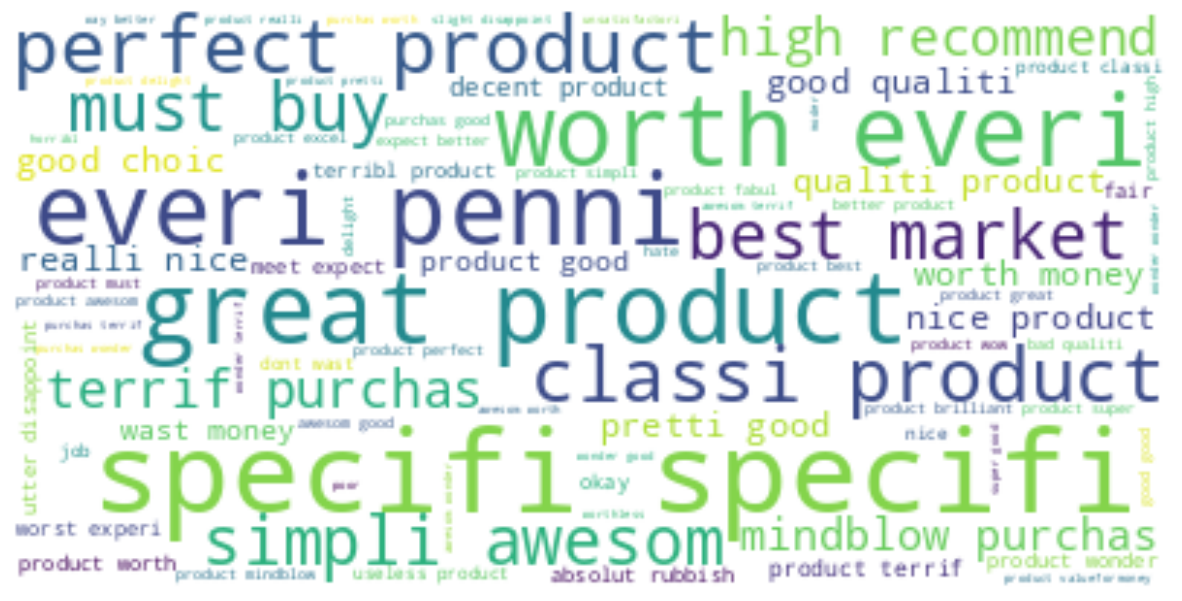

In [21]:
text = " ".join(i for i in df.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
df.columns

Index(['product_name', 'Rate', 'Review', 'Summary'], dtype='object')

## Analyze sentiment using the SentimentIntensityAnalyzer on the 'Review' column

In [23]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review"]]
df2 = df[["Review", "Positive", "Negative", "Neutral"]]
print(df2.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


            Review  Positive  Negative  Neutral
0            super       1.0     0.000    0.000
1           awesom       0.0     0.000    1.000
2             fair       1.0     0.000    0.000
3  useless product       0.0     0.737    0.263
4             fair       1.0     0.000    0.000


In [24]:
df.columns

Index(['product_name', 'Rate', 'Review', 'Summary', 'Positive', 'Negative',
       'Neutral'],
      dtype='object')

## Analyze sentiment using the SentimentIntensityAnalyzer on the 'Summary' column

In [25]:
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Summary"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Summary"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Summary"]]
df3 = df[["Summary", "Positive", "Negative", "Neutral"]]
print(df3.head())

                                             Summary  Positive  Negative  \
0  great cooler excel air flow price amaz unbelie...     0.653     0.000   
1                  best budget  fit cooler nice cool     0.855     0.000   
2                      qualiti good power air decent     0.420     0.000   
3                                    bad product fan     0.338     0.515   
4                                      ok ok product     0.815     0.000   

   Neutral  
0    0.347  
1    0.145  
2    0.580  
3    0.147  
4    0.185  


## Get user input to check its sentiment

In [26]:
user_input = input("Enter your review: ")

cleaned_input = clean(user_input)

sentiment_score = sentiments.polarity_scores(cleaned_input)

if sentiment_score['compound'] >= 0.05:
    sentiment = 'Positive'
elif sentiment_score['compound'] <= -0.05:
    sentiment = 'Negative'
else:
    sentiment = 'Neutral'

print(f"Predicted Sentiment: {sentiment}")

Enter your review: I hate this product
Predicted Sentiment: Negative
